# Replicating the Graphs in the FCC Survey
To find the link to the article please click [here](https://medium.freecodecamp.com/we-asked-15-000-people-who-they-are-and-how-theyre-learning-to-code-4104e29b2781#.von4qs49h)

The purpose is survey as a guideline to learn how to plot using the popular [matplotlib](http://matplotlib.org/) library.

# Library Import and Initial Configuration

In [1]:
#Data Handling Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I wish to remove all of the warnings that are usually generated. Since I am not doing very complex things the warning will most probably not change the outcome.

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Data Import & Summary

In [5]:
data=pd.read_csv('datasets/2016-FCC-New-Coders-Survey-Data.csv')

In [6]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [7]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB
None


In [8]:
print data.columns

Index([u'Age', u'AttendedBootcamp', u'BootcampFinish', u'BootcampFullJobAfter',
       u'BootcampLoanYesNo', u'BootcampMonthsAgo', u'BootcampName',
       u'BootcampPostSalary', u'BootcampRecommend', u'ChildrenNumber',
       ...
       u'ResourceSoloLearn', u'ResourceStackOverflow', u'ResourceTreehouse',
       u'ResourceUdacity', u'ResourceUdemy', u'ResourceW3Schools',
       u'ResourceYouTube', u'SchoolDegree', u'SchoolMajor', u'StudentDebtOwe'],
      dtype='object', length=113)


As seen above, we have 113 different columns

In [124]:
data['JobRoleInterest'].groupby(data['JobRoleInterest']).count()

JobRoleInterest
  Data Scientist / Data Engineer     646
  DevOps / SysAdmin                  219
  Front-End Web Developer           1379
  Mobile Developer                   414
  Product Manager                    191
  Quality Assurance Engineer         104
  User Experience Designer           275
Back-End Web Developer               704
Full-Stack Web Developer            2571
Name: JobRoleInterest, dtype: int64

In [125]:
total_job_role_interest=float(data['JobRoleInterest'].groupby(data['JobRoleInterest']).count().sum())

In [126]:
percentage_ds=data['JobRoleInterest'].groupby(data['JobRoleInterest']).count()/total_job_role_interest
print percentage_ds*100

JobRoleInterest
  Data Scientist / Data Engineer     9.933877
  DevOps / SysAdmin                  3.367676
  Front-End Web Developer           21.205597
  Mobile Developer                   6.366292
  Product Manager                    2.937106
  Quality Assurance Engineer         1.599262
  User Experience Designer           4.228817
Back-End Web Developer              10.825773
Full-Stack Web Developer            39.535599
Name: JobRoleInterest, dtype: float64


In [127]:
ds=data[data['JobRoleInterest']=="  Data Scientist / Data Engineer"]
print len(ds)

646


In [128]:
count=ds['JobRoleInterest'].groupby(ds['Gender']).count()
print count

Gender
agender          2
female         141
genderqueer      3
male           428
trans            2
Name: JobRoleInterest, dtype: int64


In [129]:
perc=len(ds[ds['Gender']=='female'])/float(len(ds))
perc_male=len(ds[ds['Gender']=='male'])/float(len(ds))
print "Percentage of females is: {0:.0f}%".format(perc * 100)
print "Percentage of males is: {0:.0f}%".format(perc_male * 100)

Percentage of females is: 22%
Percentage of males is: 66%


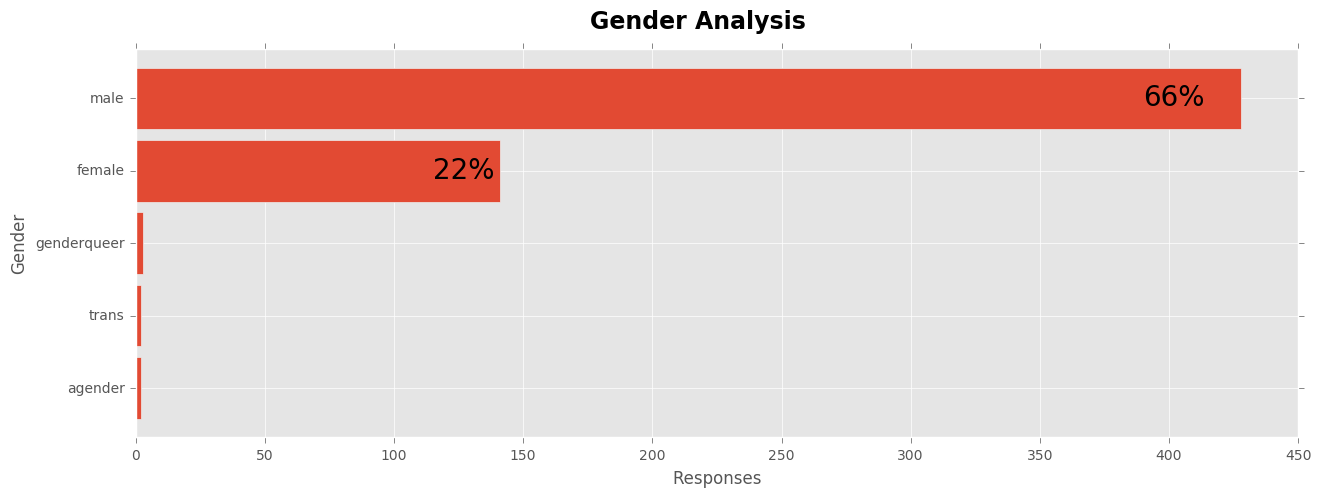

In [130]:
fig = plt.figure()
fig.suptitle('Gender Analysis', fontsize=17, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('Responses')
ax.set_ylabel('Gender')
ax.text(115,2.9,"{0:.0f}%".format(perc * 100),fontsize=20)
ax.text(390,3.9,"{0:.0f}%".format(perc_male * 100),fontsize=20)
count.sort()
count.plot(kind='barh',figsize=(15,5),width=.85)

In [131]:
print "Total different Ages: "+str((ds['Age']).value_counts().count())

Total different Ages: 44


In [132]:
ds['Age'].value_counts().sum()

572L

In [133]:
print "Total Null values: " + str(ds['Age'].isnull().sum())

Total Null values: 74


In [134]:
ds['Age'].value_counts()

25.0    42
22.0    41
23.0    40
24.0    37
19.0    32
28.0    29
20.0    28
26.0    27
27.0    25
21.0    24
30.0    24
29.0    23
31.0    18
32.0    18
18.0    18
35.0    15
33.0    12
34.0    11
37.0    10
16.0     9
17.0     9
45.0     8
36.0     8
42.0     7
40.0     7
46.0     6
38.0     6
41.0     5
43.0     4
50.0     4
39.0     4
44.0     3
47.0     2
49.0     2
51.0     2
15.0     2
55.0     2
56.0     2
65.0     1
58.0     1
48.0     1
52.0     1
54.0     1
14.0     1
Name: Age, dtype: int64

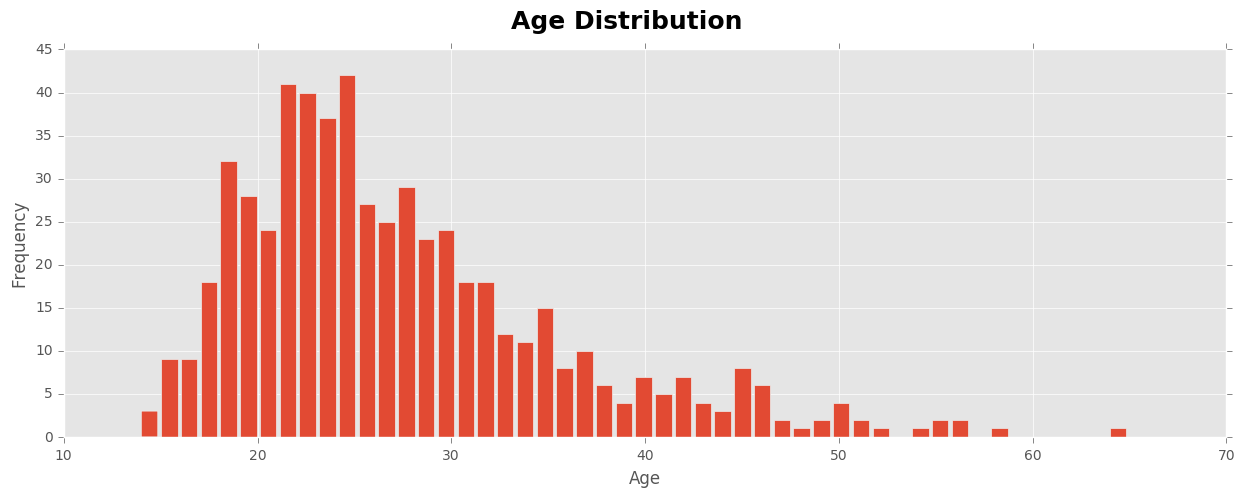

In [135]:
#Probable better to see it as a Histogram
fig = plt.figure()
fig.suptitle('Age Distribution', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('Age')


ds['Age'].plot(kind='hist',figsize=(15,5),width=.85,bins=50)

In [136]:
ds=ds.dropna(how='all')

In [140]:
ds.head()
ds=ds.dropna(subset=['Age'])
len(ds)

572

In [155]:
ds['Gender'].head()
ds.loc[data["Gender"]=="male","Gender"]=0
ds.loc[data["Gender"]=="female","Gender"]=1
ds.loc[data["Gender"]=="agender","Gender"]=2
ds.loc[data["Gender"]=="genderqueer","Gender"]=3
ds.loc[data["Gender"]=="trans","Gender"]=4

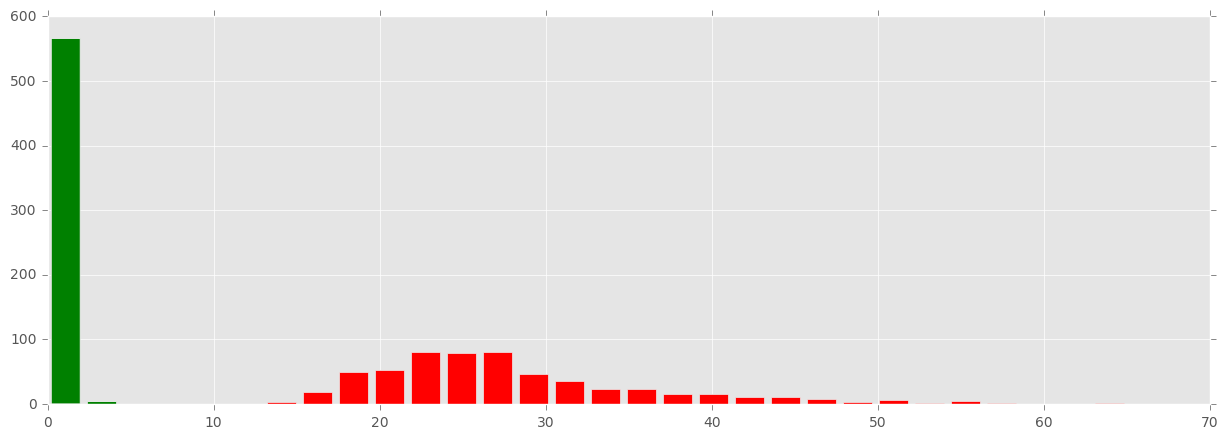

In [161]:
#Create stack histogram

figure = plt.figure(figsize=(15,5))

plt.hist([ds['Gender'],ds['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
#plt.xlabel('Age')
#plt.ylabel('Number of passengers')
#plt.legend()
plt.show()


#p1=plt.hist(ds['Age'],bins=50,color='r')
#p2=plt.hist(ds['Gender'],bins=50,color='y')

plt.show()

In [108]:
ds['EmploymentStatus'].groupby(ds['EmploymentStatus']).count()

EmploymentStatus
A stay-at-home parent or homemaker       12
Doing an unpaid internship               15
Employed for wages                      267
Military                                  3
Not working and not looking for work     56
Not working but looking for work        137
Retired                                   2
Self-employed business owner              8
Self-employed freelancer                 15
Unable to work                            6
Name: EmploymentStatus, dtype: int64

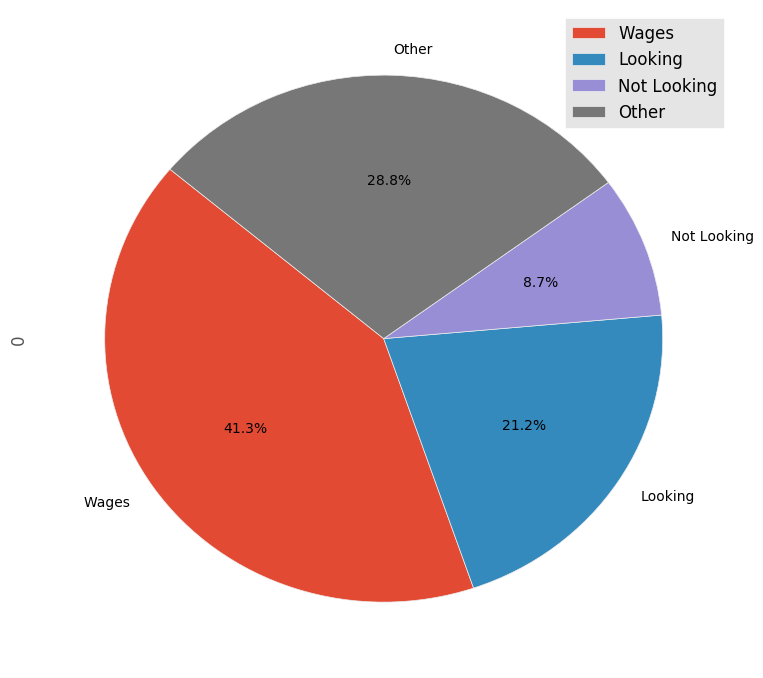

In [152]:
#Calculate Values
wages = ds[ds['EmploymentStatus']=='Employed for wages']['EmploymentStatus'].count()
looking = ds[ds['EmploymentStatus']=='Not working but looking for work']['EmploymentStatus'].count()
not_looking = ds[ds['EmploymentStatus']=='Not working and not looking for work']['EmploymentStatus'].count()
other=len(ds)-wages-looking-not_looking

df = pd.DataFrame([wages,looking,not_looking,other])
df.index = ['Wages','Looking','Not Looking','Other']

fig = plt.figure()
fig.suptitle('Employment Status', fontsize=18, fontweight='bold')
df.plot(kind='pie',figsize=(9,8.5),subplots=True,startangle=140,autopct='%1.1f%%')
plt.show()